### Below: Pleiades Constellation data graphed
#### 1 degree box around the star cluster, possibly break up by parsec

SQL:
SELECT * 
from gaiadr2.gaia_source 
where 
RA between 56.35 and 57.35 AND
DEC between 23.65 and 24.65 AND
parallax > 0

In [2]:
#Functions for distance, x, y, and z
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

def distance(x):
    #it shouldn't be less than 0 since I'm not getting any negative parallaxes from Gaia
    if x < 0:
        return 0
    else:
        return 1/x
def x(R, b, l):
    return R * math.cos(b) * math.cos(l)

def y(R, b, l):
    return R * math.cos(b) * math.sin(l)

def z(R, b):
    return R * math.sin(b)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


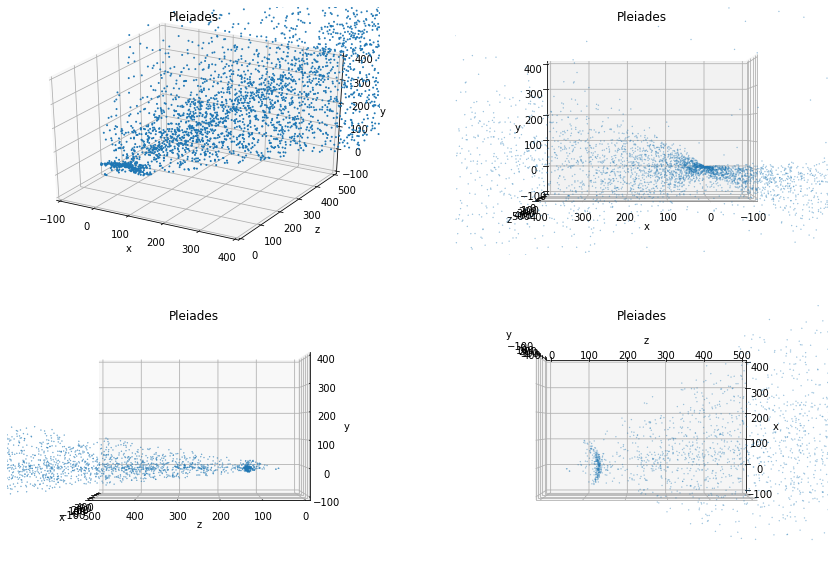

In [2]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 56.35 and 57.35 AND 
#DEC between 23.65 and 24.65

data_frame = pd.read_csv("pleiades.csv")
pleiades = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
pleiades.loc[:, 'parallax_arcsec'] = pleiades['parallax'].apply(lambda x: x*.001)
pleiades.loc[:, 'R'] = pleiades['parallax_arcsec'].apply(distance)
pleiades.loc[:, 'x'] = pleiades.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
pleiades.loc[:, 'y'] = pleiades.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
pleiades.loc[:, 'z'] = pleiades.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axp = fig.add_subplot(221, projection ='3d')
axp.scatter(pleiades['x'], pleiades['z'], pleiades['y'], s=1)
axp.set_xlim([-100, 400])
axp.set_ylim([0, 500])
axp.set_zlim([-100, 400])
axp.set_xlabel('x')
axp.set_ylabel('z')
axp.set_zlabel('y')
axp.set_title('Pleiades')

axp1 = fig.add_subplot(222, projection ='3d')
axp1.scatter(pleiades['x'], pleiades['z'], pleiades['y'], s=0.1)
axp1.set_xlim([-100, 400])
axp1.set_ylim([0, 500])
axp1.set_zlim([-100, 400])
axp1.set_xlabel('x')
axp1.set_ylabel('z')
axp1.set_zlabel('y')
axp1.set_title('Pleiades')
axp1.view_init(0, 90)
plt.show

axp2 = fig.add_subplot(223, projection ='3d')
axp2.scatter(pleiades['x'], pleiades['z'], pleiades['y'], s=0.1)
axp2.set_xlim([-100, 400])
axp2.set_ylim([0, 500])
axp2.set_zlim([-100, 400])
axp2.set_xlabel('x')
axp2.set_ylabel('z')
axp2.set_zlabel('y')
axp2.set_title('Pleiades')
axp2.view_init(0, 180)
plt.show

axp3 = fig.add_subplot(224, projection ='3d')
axp3.scatter(pleiades['x'], pleiades['z'], pleiades['y'], s=0.1)
axp3.set_xlim([-100, 400])
axp3.set_ylim([0, 500])
axp3.set_zlim([-100, 400])
axp3.set_xlabel('x')
axp3.set_ylabel('z')
axp3.set_zlabel('y')
axp3.set_title('Pleiades')
axp3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


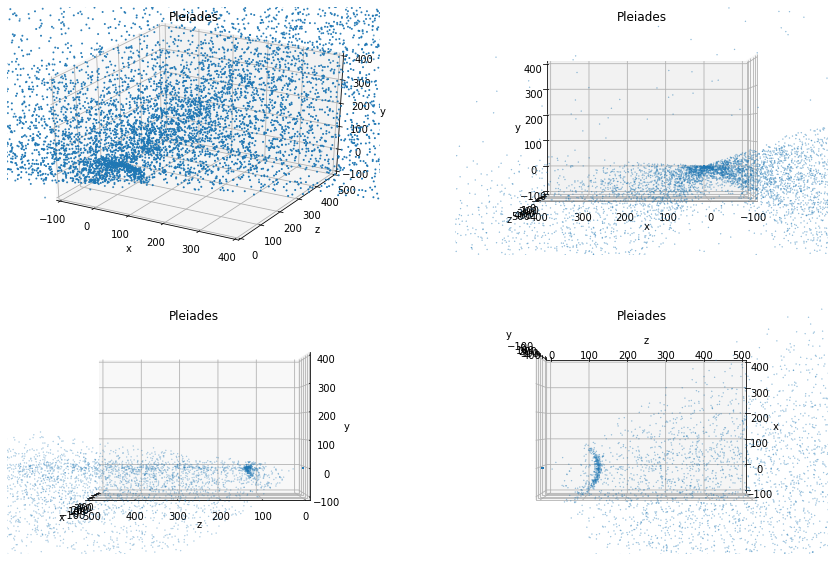

In [3]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 56 and 57 AND
#DEC between 23 and 25

data_frame = pd.read_csv("pleiades_2degrees.csv")
pleiades2 = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
pleiades2.loc[:, 'parallax_arcsec'] = pleiades2['parallax'].apply(lambda x: x*.001)
pleiades2.loc[:, 'R'] = pleiades2['parallax_arcsec'].apply(distance)
pleiades2.loc[:, 'x'] = pleiades2.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
pleiades2.loc[:, 'y'] = pleiades2.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
pleiades2.loc[:, 'z'] = pleiades2.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axp = fig.add_subplot(221, projection ='3d')
axp.scatter(pleiades2['x'], pleiades2['z'], pleiades2['y'], s=1)
axp.set_xlim([-100, 400])
axp.set_ylim([0, 500])
axp.set_zlim([-100, 400])
axp.set_xlabel('x')
axp.set_ylabel('z')
axp.set_zlabel('y')
axp.set_title('Pleiades')

axp1 = fig.add_subplot(222, projection ='3d')
axp1.scatter(pleiades2['x'], pleiades2['z'], pleiades2['y'], s=0.1)
axp1.set_xlim([-100, 400])
axp1.set_ylim([0, 500])
axp1.set_zlim([-100, 400])
axp1.set_xlabel('x')
axp1.set_ylabel('z')
axp1.set_zlabel('y')
axp1.set_title('Pleiades')
axp1.view_init(0, 90)
plt.show

axp2 = fig.add_subplot(223, projection ='3d')
axp2.scatter(pleiades2['x'], pleiades2['z'], pleiades2['y'], s=0.1)
axp2.set_xlim([-100, 400])
axp2.set_ylim([0, 500])
axp2.set_zlim([-100, 400])
axp2.set_xlabel('x')
axp2.set_ylabel('z')
axp2.set_zlabel('y')
axp2.set_title('Pleiades')
axp2.view_init(0, 180)
plt.show

axp3 = fig.add_subplot(224, projection ='3d')
axp3.scatter(pleiades2['x'], pleiades2['z'], pleiades2['y'], s=0.1)
axp3.set_xlim([-100, 400])
axp3.set_ylim([0, 500])
axp3.set_zlim([-100, 400])
axp3.set_xlabel('x')
axp3.set_ylabel('z')
axp3.set_zlabel('y')
axp3.set_title('Pleiades')
axp3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

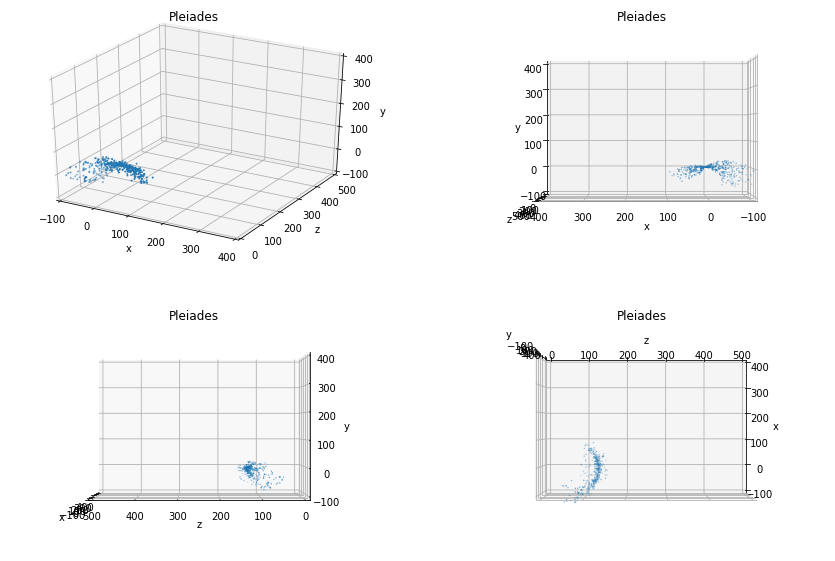

In [4]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 56 and 57 AND
#DEC between 23 and 25 AND
#parallax > 6.2 AND parallax < 12.5

data_frame = pd.read_csv("pleiades_2_degrees.csv")
pleiades2_trimmed = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
pleiades2_trimmed.loc[:, 'parallax_arcsec'] = pleiades2_trimmed['parallax'].apply(lambda x: x*.001)
pleiades2_trimmed.loc[:, 'R'] = pleiades2_trimmed['parallax_arcsec'].apply(distance)
pleiades2_trimmed.loc[:, 'x'] = pleiades2_trimmed.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
pleiades2_trimmed.loc[:, 'y'] = pleiades2_trimmed.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
pleiades2_trimmed.loc[:, 'z'] = pleiades2_trimmed.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axp = fig.add_subplot(221, projection ='3d')
axp.scatter(pleiades2_trimmed['x'], pleiades2_trimmed['z'], pleiades2_trimmed['y'], s=1)
axp.set_xlim([-100, 400])
axp.set_ylim([0, 500])
axp.set_zlim([-100, 400])
axp.set_xlabel('x')
axp.set_ylabel('z')
axp.set_zlabel('y')
axp.set_title('Pleiades')

axp1 = fig.add_subplot(222, projection ='3d')
axp1.scatter(pleiades2_trimmed['x'], pleiades2_trimmed['z'], pleiades2_trimmed['y'], s=0.1)
axp1.set_xlim([-100, 400])
axp1.set_ylim([0, 500])
axp1.set_zlim([-100, 400])
axp1.set_xlabel('x')
axp1.set_ylabel('z')
axp1.set_zlabel('y')
axp1.set_title('Pleiades')
axp1.view_init(0, 90)
plt.show

axp2 = fig.add_subplot(223, projection ='3d')
axp2.scatter(pleiades2_trimmed['x'], pleiades2_trimmed['z'], pleiades2_trimmed['y'], s=0.1)
axp2.set_xlim([-100, 400])
axp2.set_ylim([0, 500])
axp2.set_zlim([-100, 400])
axp2.set_xlabel('x')
axp2.set_ylabel('z')
axp2.set_zlabel('y')
axp2.set_title('Pleiades')
axp2.view_init(0, 180)
plt.show

axp3 = fig.add_subplot(224, projection ='3d')
axp3.scatter(pleiades2_trimmed['x'], pleiades2_trimmed['z'], pleiades2_trimmed['y'], s=0.1)
axp3.set_xlim([-100, 400])
axp3.set_ylim([0, 500])
axp3.set_zlim([-100, 400])
axp3.set_xlabel('x')
axp3.set_ylabel('z')
axp3.set_zlabel('y')
axp3.set_title('Pleiades')
axp3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

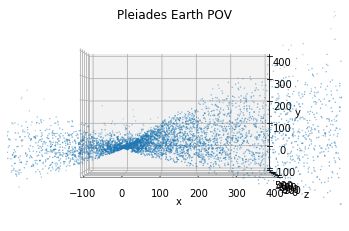

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.scatter(pleiades['x'], pleiades['z'], pleiades['y'], s=0.1)
ax.set_xlim([-100, 400])
ax.set_ylim([0, 500])
ax.set_zlim([-100, 400])
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_title('Pleiades Earth POV')
ax.view_init(0, 270)
plt.show()

### Below: random 1 degree boxes to compare to the Pleiades cluster.

Analysis of the below graphs as well as Pleiades above:

They all look like star clusters when just the Pleiades is a cluster. This is due to outlier "stars" found outside the Milky Way. In order to fix this, I'm going to "zoom" into the part of the graph where each "cluster" (really just the Milky Way) is.

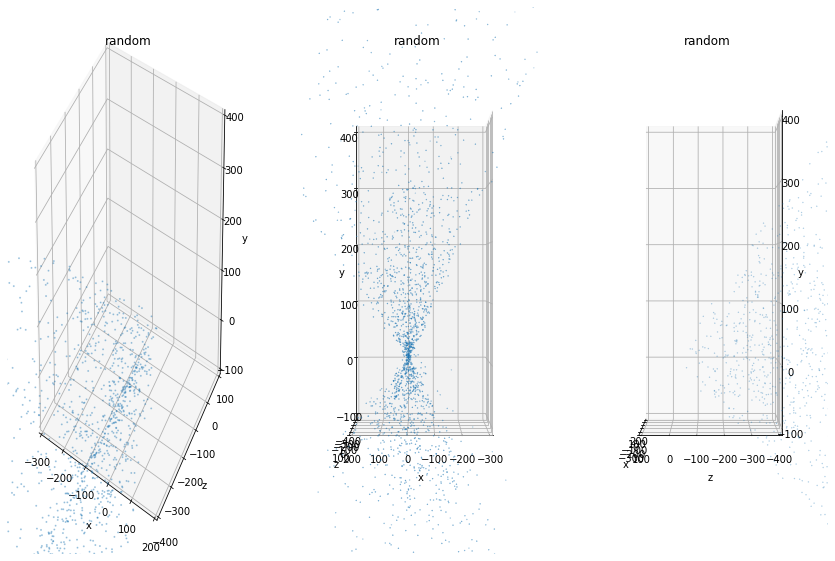

In [6]:
#RA between 6.35 and 7.35
#DEC between 3.65 and 4.65

data_frame = pd.read_csv("random.csv")
random = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
random.loc[:, 'parallax_arcsec'] = random['parallax'].apply(lambda x: x*.001)
random.loc[:, 'R'] = random['parallax_arcsec'].apply(distance)
random.loc[:, 'x'] = random.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
random.loc[:, 'y'] = random.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
random.loc[:, 'z'] = random.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axr = fig.add_subplot(131, projection ='3d')
axr.scatter(random['x'], random['z'], random['y'], s=1)
axr.set_xlim([-300, 200])
axr.set_ylim([-400, 100])
axr.set_zlim([-100, 400])
axr.set_xlabel('x')
axr.set_ylabel('z')
axr.set_zlabel('y')
axr.set_title('random')

axr1 = fig.add_subplot(132, projection ='3d')
axr1.scatter(random['x'], random['z'], random['y'], s=0.1)
axr1.set_xlim([-300, 200])
axr1.set_ylim([-400, 100])
axr1.set_zlim([-100, 400])
axr1.set_xlabel('x')
axr1.set_ylabel('z')
axr1.set_zlabel('y')
axr1.set_title('random')
axr1.view_init(0, 90)
plt.show

axr2 = fig.add_subplot(133, projection ='3d')
axr2.scatter(random['x'], random['z'], random['y'], s=0.1)
axr2.set_xlim([-300, 200])
axr2.set_ylim([-400, 100])
axr2.set_zlim([-100, 400])
axr2.set_xlabel('x')
axr2.set_ylabel('z')
axr2.set_zlabel('y')
axr2.set_title('random')
axr2.view_init(0, 180)
plt.show

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

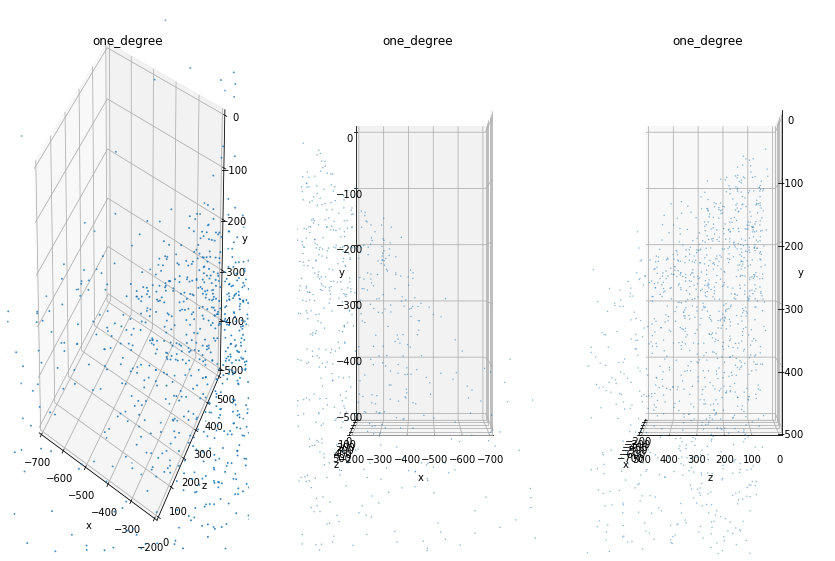

In [7]:
#RA between 10 and 11
#DEC between 0 and 1

data_frame = pd.read_csv("one-degree-box-old.csv")
one_degree = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
one_degree.loc[:, 'parallax_arcsec'] = one_degree['parallax'].apply(lambda x: x*.001)
one_degree.loc[:, 'R'] = one_degree['parallax_arcsec'].apply(distance)
one_degree.loc[:, 'x'] = one_degree.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
one_degree.loc[:, 'y'] = one_degree.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
one_degree.loc[:, 'z'] = one_degree.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axo = fig.add_subplot(131, projection ='3d')
axo.scatter(one_degree['x'], one_degree['z'], one_degree['y'], s=1)
axo.set_xlim([-700, -200])
axo.set_ylim([0, 500])
axo.set_zlim([-500, 0])
axo.set_xlabel('x')
axo.set_ylabel('z')
axo.set_zlabel('y')
axo.set_title('one_degree')

axo1 = fig.add_subplot(132, projection ='3d')
axo1.scatter(one_degree['x'], one_degree['z'], one_degree['y'], s=0.1)
axo1.set_xlim([-700, -200])
axo1.set_ylim([0, 500])
axo1.set_zlim([-500, 0])
axo1.set_xlabel('x')
axo1.set_ylabel('z')
axo1.set_zlabel('y')
axo1.set_title('one_degree')
axo1.view_init(0, 90)
plt.show

axo2 = fig.add_subplot(133, projection ='3d')
axo2.scatter(one_degree['x'], one_degree['z'], one_degree['y'], s=0.1)
axo2.set_xlim([-700, -200])
axo2.set_ylim([0, 500])
axo2.set_zlim([-500, 0])
axo2.set_xlabel('x')
axo2.set_ylabel('z')
axo2.set_zlabel('y')
axo2.set_title('one_degree')
axo2.view_init(0, 180)
plt.show

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

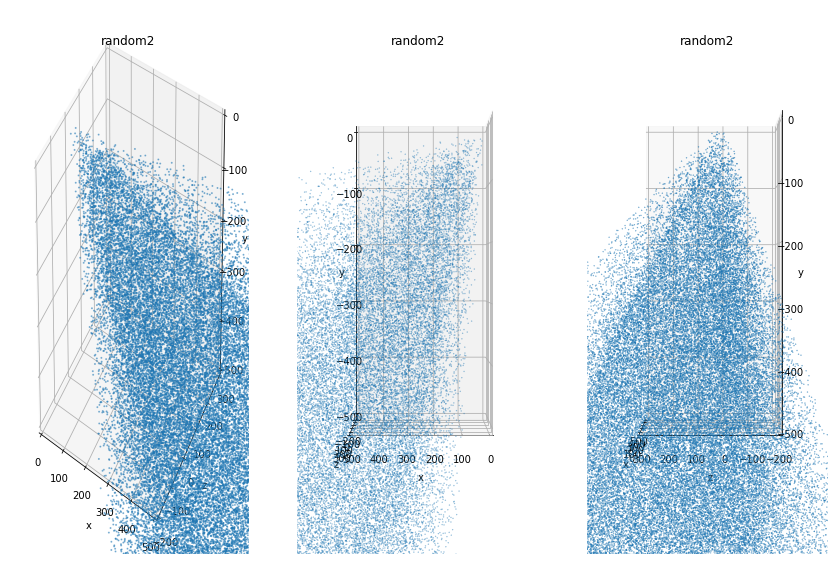

In [8]:
#RA between 277 and 278
#DEC between -32 and -31

data_frame = pd.read_csv("new.csv")
new= data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
new.loc[:, 'parallax_arcsec'] = new['parallax'].apply(lambda x: x*.001)
new.loc[:, 'R'] = new['parallax_arcsec'].apply(distance)
new.loc[:, 'x'] = new.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
new.loc[:, 'y'] = new.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
new.loc[:, 'z'] = new.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axn = fig.add_subplot(131, projection ='3d')
axn.scatter(new['x'], new['z'], new['y'], s=1)
axn.set_xlim([0, 500])
axn.set_ylim([-200, 300])
axn.set_zlim([-500, 0])
axn.set_xlabel('x')
axn.set_ylabel('z')
axn.set_zlabel('y')
axn.set_title('random2')

axn1 = fig.add_subplot(132, projection ='3d')
axn1.scatter(new['x'], new['z'], new['y'], s=0.1)
axn1.set_xlim([0, 500])
axn1.set_ylim([-200, 300])
axn1.set_zlim([-500, 0])
axn1.set_xlabel('x')
axn1.set_ylabel('z')
axn1.set_zlabel('y')
axn1.set_title('random2')
axn1.view_init(0, 90)
plt.show

axn2 = fig.add_subplot(133, projection ='3d')
axn2.scatter(new['x'], new['z'], new['y'], s=0.1)
axn2.set_xlim([0, 500])
axn2.set_ylim([-200, 300])
axn2.set_zlim([-500, 0])
axn2.set_xlabel('x')
axn2.set_ylabel('z')
axn2.set_zlabel('y')
axn2.set_title('random2')
axn2.view_init(0, 180)
plt.show

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

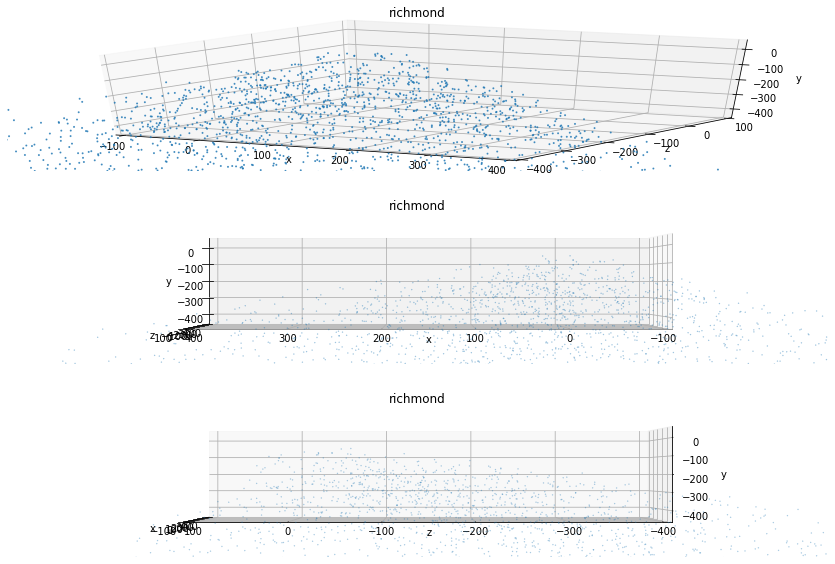

In [9]:
#Dr. Richmond's suggestion

#RA between 56.35 and 57.35 AND
#DEC between 17.5 and 18.5

data_frame = pd.read_csv("richmond.csv")
richmond = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
richmond.loc[:, 'parallax_arcsec'] = richmond['parallax'].apply(lambda x: x*.001)
richmond.loc[:, 'R'] = richmond['parallax_arcsec'].apply(distance)
richmond.loc[:, 'x'] = richmond.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
richmond.loc[:, 'y'] = richmond.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
richmond.loc[:, 'z'] = richmond.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axr = fig.add_subplot(311, projection ='3d')
axr.scatter(richmond['x'], richmond['z'], richmond['y'], s=1)
axr.set_xlim([-100, 400])
axr.set_ylim([-400, 100])
axr.set_zlim([-450, 50])
axr.set_xlabel('x')
axr.set_ylabel('z')
axr.set_zlabel('y')
axr.set_title('richmond')

axr1 = fig.add_subplot(312, projection ='3d')
axr1.scatter(richmond['x'], richmond['z'], richmond['y'], s=0.1)
axr1.set_xlim([-100, 400])
axr1.set_ylim([-400, 100])
axr1.set_zlim([-450, 50])
axr1.set_xlabel('x')
axr1.set_ylabel('z')
axr1.set_zlabel('y')
axr1.set_title('richmond')
axr1.view_init(0, 90)
plt.show

axr2 = fig.add_subplot(313, projection ='3d')
axr2.scatter(richmond['x'], richmond['z'], richmond['y'], s=0.1)
axr2.set_xlim([-100, 400])
axr2.set_ylim([-400, 100])
axr2.set_zlim([-450, 50])
axr2.set_xlabel('x')
axr2.set_ylabel('z')
axr2.set_zlabel('y')
axr2.set_title('richmond')
axr2.view_init(0, 180)
plt.show

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

### Below: graphs showing stars within 0.01pc for each graph
* First is Dr. Richmond's suggested 1by1 box
* Second is the Pleiades cluster
* The parallax for each displayed in the title

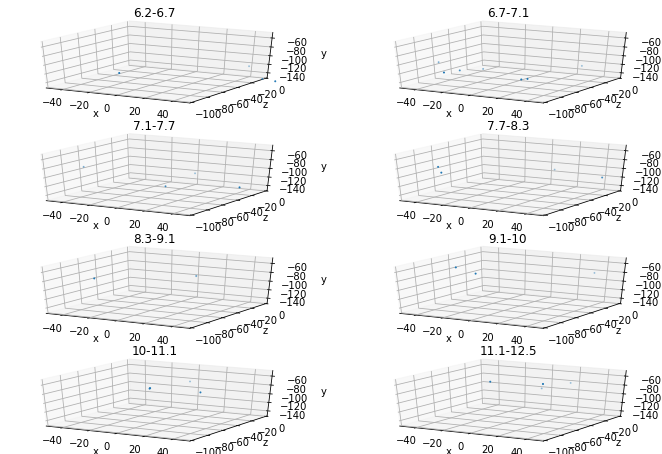

In [10]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 56.35 and 57.35 AND
#DEC between 17.5 and 18.5 AND
#parallax > 6.2 AND parallax <= 6.7

#6.2-6.7
data_frame = pd.read_csv("random6.2-6.7.csv")
a = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
a.loc[:, 'parallax_arcsec'] = a['parallax'].apply(lambda x: x*.001)
a.loc[:, 'R'] = a['parallax_arcsec'].apply(distance)
a.loc[:, 'x'] = a.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
a.loc[:, 'y'] = a.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
a.loc[:, 'z'] = a.apply(lambda r: z(r['R'], r['b']), axis=1)


#6.7-7.1
data_frame = pd.read_csv("random6.7-7.1.csv")
b = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
b.loc[:, 'parallax_arcsec'] = b['parallax'].apply(lambda x: x*.001)
b.loc[:, 'R'] = b['parallax_arcsec'].apply(distance)
b.loc[:, 'x'] = b.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
b.loc[:, 'y'] = b.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
b.loc[:, 'z'] = b.apply(lambda r: z(r['R'], r['b']), axis=1)


#7.1-7.7
data_frame = pd.read_csv("random7.1-7.7.csv")
c = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
c.loc[:, 'parallax_arcsec'] = c['parallax'].apply(lambda x: x*.001)
c.loc[:, 'R'] = c['parallax_arcsec'].apply(distance)
c.loc[:, 'x'] = c.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
c.loc[:, 'y'] = c.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
c.loc[:, 'z'] = c.apply(lambda r: z(r['R'], r['b']), axis=1)


#7.7-8.3
data_frame = pd.read_csv("random7.7-8.3.csv")
d = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
d.loc[:, 'parallax_arcsec'] = d['parallax'].apply(lambda x: x*.001)
d.loc[:, 'R'] = d['parallax_arcsec'].apply(distance)
d.loc[:, 'x'] = d.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
d.loc[:, 'y'] = d.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
d.loc[:, 'z'] = d.apply(lambda r: z(r['R'], r['b']), axis=1)


#8.3-9.1
data_frame = pd.read_csv("random8.3-9.1.csv")
e = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
e.loc[:, 'parallax_arcsec'] = e['parallax'].apply(lambda x: x*.001)
e.loc[:, 'R'] = e['parallax_arcsec'].apply(distance)
e.loc[:, 'x'] = e.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
e.loc[:, 'y'] = e.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
e.loc[:, 'z'] = e.apply(lambda r: z(r['R'], r['b']), axis=1)


#9.1-10
data_frame = pd.read_csv("random9.1-10.csv")
f = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
f.loc[:, 'parallax_arcsec'] = f['parallax'].apply(lambda x: x*.001)
f.loc[:, 'R'] = f['parallax_arcsec'].apply(distance)
f.loc[:, 'x'] = f.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
f.loc[:, 'y'] = f.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
f.loc[:, 'z'] = f.apply(lambda r: z(r['R'], r['b']), axis=1)


#10-11.1
data_frame = pd.read_csv("random10-11.1.csv")
g = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
g.loc[:, 'parallax_arcsec'] = g['parallax'].apply(lambda x: x*.001)
g.loc[:, 'R'] = g['parallax_arcsec'].apply(distance)
g.loc[:, 'x'] = g.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
g.loc[:, 'y'] = g.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
g.loc[:, 'z'] = g.apply(lambda r: z(r['R'], r['b']), axis=1)


#11.1-12.5
data_frame = pd.read_csv("random11.1-12.5.csv")
h = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
h.loc[:, 'parallax_arcsec'] = h['parallax'].apply(lambda x: x*.001)
h.loc[:, 'R'] = h['parallax_arcsec'].apply(distance)
h.loc[:, 'x'] = h.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
h.loc[:, 'y'] = h.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
h.loc[:, 'z'] = h.apply(lambda r: z(r['R'], r['b']), axis=1)


fig = plt.figure()
axa = fig.add_subplot(421, projection ='3d')
axa.scatter(a['x'], a['z'], a['y'],  s=1)
axa.set_xlim([-50, 50])
axa.set_ylim([-100, 0])
axa.set_zlim([-150, -50])
axa.set_xlabel('x')
axa.set_ylabel('z')
axa.set_zlabel('y')
axa.set_title('6.2-6.7')

axb = fig.add_subplot(422, projection ='3d')
axb.scatter(b['x'], b['z'], b['y'], s=1)
axb.set_xlim([-50, 50])
axb.set_ylim([-100, 0])
axb.set_zlim([-150, -50])
axb.set_xlabel('x')
axb.set_ylabel('z')
axb.set_zlabel('y')
axb.set_title('6.7-7.1')

axc = fig.add_subplot(423, projection ='3d')
axc.scatter(c['x'], c['z'], c['y'], s=1)
axc.set_xlim([-50, 50])
axc.set_ylim([-100, 0])
axc.set_zlim([-150, -50])
axc.set_xlabel('x')
axc.set_ylabel('z')
axc.set_zlabel('y')
axc.set_title('7.1-7.7')

axd = fig.add_subplot(424, projection ='3d')
axd.scatter(d['x'], d['z'], d['y'], s=1)
axd.set_xlim([-50, 50])
axd.set_ylim([-100, 0])
axd.set_zlim([-150, -50])
axd.set_xlabel('x')
axd.set_ylabel('z')
axd.set_zlabel('y')
axd.set_title('7.7-8.3')

axe = fig.add_subplot(425, projection ='3d')
axe.scatter(e['x'], e['z'], e['y'],  s=1)
axe.set_xlim([-50, 50])
axe.set_ylim([-100, 0])
axe.set_zlim([-150, -50])
axe.set_xlabel('x')
axe.set_ylabel('z')
axe.set_zlabel('y')
axe.set_title('8.3-9.1')

axf = fig.add_subplot(426, projection ='3d')
axf.scatter(f['x'], f['z'], f['y'], s=1)
axf.set_xlim([-50, 50])
axf.set_ylim([-100, 0])
axf.set_zlim([-150, -50])
axf.set_xlabel('x')
axf.set_ylabel('z')
axf.set_zlabel('y')
axf.set_title('9.1-10')

axg = fig.add_subplot(427, projection ='3d')
axg.scatter(g['x'], g['z'], g['y'], s=1)
axg.set_xlim([-50, 50])
axg.set_ylim([-100, 0])
axg.set_zlim([-150, -50])
axg.set_xlabel('x')
axg.set_ylabel('z')
axg.set_zlabel('y')
axg.set_title('10-11.1')

axh = fig.add_subplot(428, projection ='3d')
axh.scatter(h['x'], h['z'], h['y'], s=1)
axh.set_xlim([-50, 50])
axh.set_ylim([-100, 0])
axh.set_zlim([-150, -50])
axh.set_xlabel('x')
axh.set_ylabel('z')
axh.set_zlabel('y')
axh.set_title('11.1-12.5')

plt.subplots_adjust(1.5, 1.5, 3, 3)

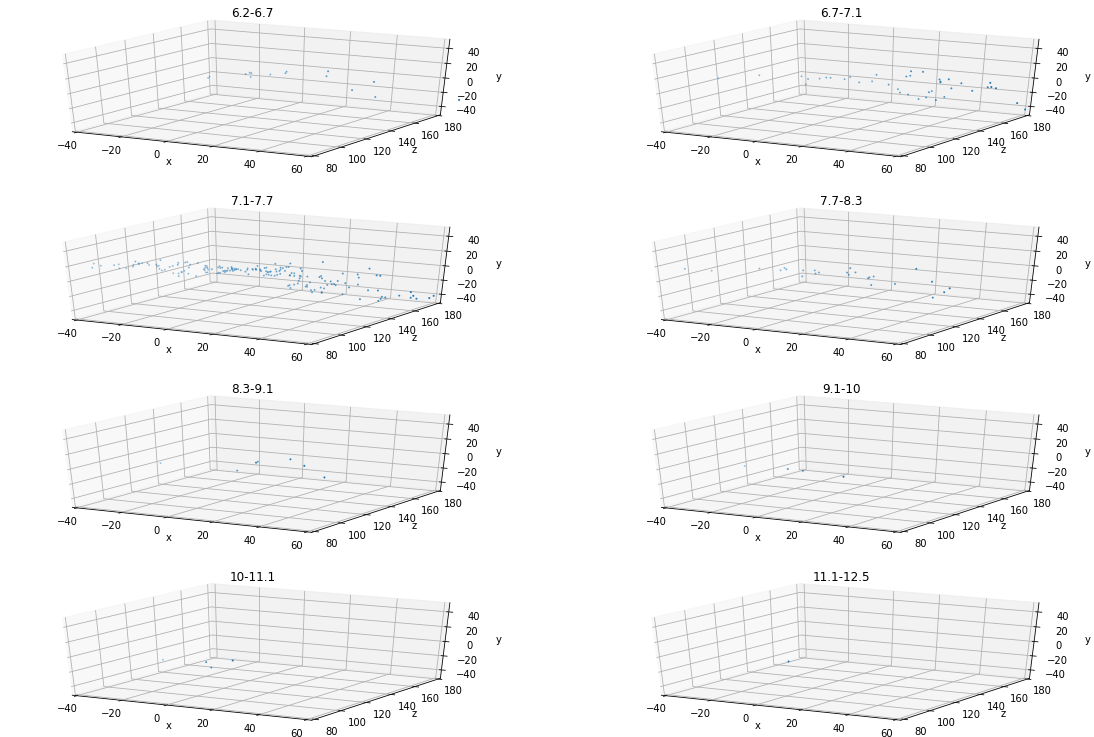

In [11]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 56.35 and 57.35 AND
#DEC between 23.65 and 24.65 AND
#parallax > 6.2 AND parallax <= 6.7

#6.2-6.7
data_frame = pd.read_csv("pleiades6.2-6.7.csv")
a = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
a.loc[:, 'parallax_arcsec'] = a['parallax'].apply(lambda x: x*.001)
a.loc[:, 'R'] = a['parallax_arcsec'].apply(distance)
a.loc[:, 'x'] = a.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
a.loc[:, 'y'] = a.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
a.loc[:, 'z'] = a.apply(lambda r: z(r['R'], r['b']), axis=1)


#6.7-7.1
data_frame = pd.read_csv("pleiades6.7-7.1.csv")
b = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
b.loc[:, 'parallax_arcsec'] = b['parallax'].apply(lambda x: x*.001)
b.loc[:, 'R'] = b['parallax_arcsec'].apply(distance)
b.loc[:, 'x'] = b.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
b.loc[:, 'y'] = b.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
b.loc[:, 'z'] = b.apply(lambda r: z(r['R'], r['b']), axis=1)


#7.1-7.7
data_frame = pd.read_csv("pleiades7.1-7.7.csv")
c = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
c.loc[:, 'parallax_arcsec'] = c['parallax'].apply(lambda x: x*.001)
c.loc[:, 'R'] = c['parallax_arcsec'].apply(distance)
c.loc[:, 'x'] = c.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
c.loc[:, 'y'] = c.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
c.loc[:, 'z'] = c.apply(lambda r: z(r['R'], r['b']), axis=1)


#7.7-8.3
data_frame = pd.read_csv("pleiades7.7-8.3.csv")
d = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
d.loc[:, 'parallax_arcsec'] = d['parallax'].apply(lambda x: x*.001)
d.loc[:, 'R'] = d['parallax_arcsec'].apply(distance)
d.loc[:, 'x'] = d.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
d.loc[:, 'y'] = d.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
d.loc[:, 'z'] = d.apply(lambda r: z(r['R'], r['b']), axis=1)


#8.3-9.1
data_frame = pd.read_csv("pleiades8.3-9.1.csv")
e = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
e.loc[:, 'parallax_arcsec'] = e['parallax'].apply(lambda x: x*.001)
e.loc[:, 'R'] = e['parallax_arcsec'].apply(distance)
e.loc[:, 'x'] = e.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
e.loc[:, 'y'] = e.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
e.loc[:, 'z'] = e.apply(lambda r: z(r['R'], r['b']), axis=1)


#9.1-10
data_frame = pd.read_csv("pleiades9.1-10.csv")
f = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
f.loc[:, 'parallax_arcsec'] = f['parallax'].apply(lambda x: x*.001)
f.loc[:, 'R'] = f['parallax_arcsec'].apply(distance)
f.loc[:, 'x'] = f.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
f.loc[:, 'y'] = f.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
f.loc[:, 'z'] = f.apply(lambda r: z(r['R'], r['b']), axis=1)


#10-11.1
data_frame = pd.read_csv("pleiades10-11.1.csv")
g = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
g.loc[:, 'parallax_arcsec'] = g['parallax'].apply(lambda x: x*.001)
g.loc[:, 'R'] = g['parallax_arcsec'].apply(distance)
g.loc[:, 'x'] = g.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
g.loc[:, 'y'] = g.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
g.loc[:, 'z'] = g.apply(lambda r: z(r['R'], r['b']), axis=1)


#11.1-12.5
data_frame = pd.read_csv("pleiades11.1-12.5.csv")
h = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
h.loc[:, 'parallax_arcsec'] = h['parallax'].apply(lambda x: x*.001)
h.loc[:, 'R'] = h['parallax_arcsec'].apply(distance)
h.loc[:, 'x'] = h.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
h.loc[:, 'y'] = h.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
h.loc[:, 'z'] = h.apply(lambda r: z(r['R'], r['b']), axis=1)


fig = plt.figure()
axa = fig.add_subplot(421, projection ='3d')
axa.scatter(a['x'], a['z'], a['y'],  s=1)
axa.set_xlim([-40, 60])
axa.set_ylim([80, 180])
axa.set_zlim([-50, 50])
axa.set_xlabel('x')
axa.set_ylabel('z')
axa.set_zlabel('y')
axa.set_title('6.2-6.7')

axb = fig.add_subplot(422, projection ='3d')
axb.scatter(b['x'], b['z'], b['y'], s=1)
axb.set_xlim([-40, 60])
axb.set_ylim([80, 180])
axb.set_zlim([-50, 50])
axb.set_xlabel('x')
axb.set_ylabel('z')
axb.set_zlabel('y')
axb.set_title('6.7-7.1')

axc = fig.add_subplot(423, projection ='3d')
axc.scatter(c['x'], c['z'], c['y'], s=1)
axc.set_xlim([-40, 60])
axc.set_ylim([80, 180])
axc.set_zlim([-50, 50])
axc.set_xlabel('x')
axc.set_ylabel('z')
axc.set_zlabel('y')
axc.set_title('7.1-7.7')

axd = fig.add_subplot(424, projection ='3d')
axd.scatter(d['x'], d['z'], d['y'], s=1)
axd.set_xlim([-40, 60])
axd.set_ylim([80, 180])
axd.set_zlim([-50, 50])
axd.set_xlabel('x')
axd.set_ylabel('z')
axd.set_zlabel('y')
axd.set_title('7.7-8.3')

axe = fig.add_subplot(425, projection ='3d')
axe.scatter(e['x'], e['z'], e['y'],  s=1)
axe.set_xlim([-40, 60])
axe.set_ylim([80, 180])
axe.set_zlim([-50, 50])
axe.set_xlabel('x')
axe.set_ylabel('z')
axe.set_zlabel('y')
axe.set_title('8.3-9.1')

axf = fig.add_subplot(426, projection ='3d')
axf.scatter(f['x'], f['z'], f['y'], s=1)
axf.set_xlim([-40, 60])
axf.set_ylim([80, 180])
axf.set_zlim([-50, 50])
axf.set_xlabel('x')
axf.set_ylabel('z')
axf.set_zlabel('y')
axf.set_title('9.1-10')

axg = fig.add_subplot(427, projection ='3d')
axg.scatter(g['x'], g['z'], g['y'], s=1)
axg.set_xlim([-40, 60])
axg.set_ylim([80, 180])
axg.set_zlim([-50, 50])
axg.set_xlabel('x')
axg.set_ylabel('z')
axg.set_zlabel('y')
axg.set_title('10-11.1')

axh = fig.add_subplot(428, projection ='3d')
axh.scatter(h['x'], h['z'], h['y'], s=1)
axh.set_xlim([-40, 60])
axh.set_ylim([80, 180])
axh.set_zlim([-50, 50])
axh.set_xlabel('x')
axh.set_ylabel('z')
axh.set_zlabel('y')
axh.set_title('11.1-12.5')

plt.subplots_adjust(1.5, 1.5, 4, 4)

### Below is the xy, xz, and yz graphs of Pleiades within 7.1 and 7.7 milliarcseconds
Essentially the viewpoint of a 3d graph before 3d graphing was possible.

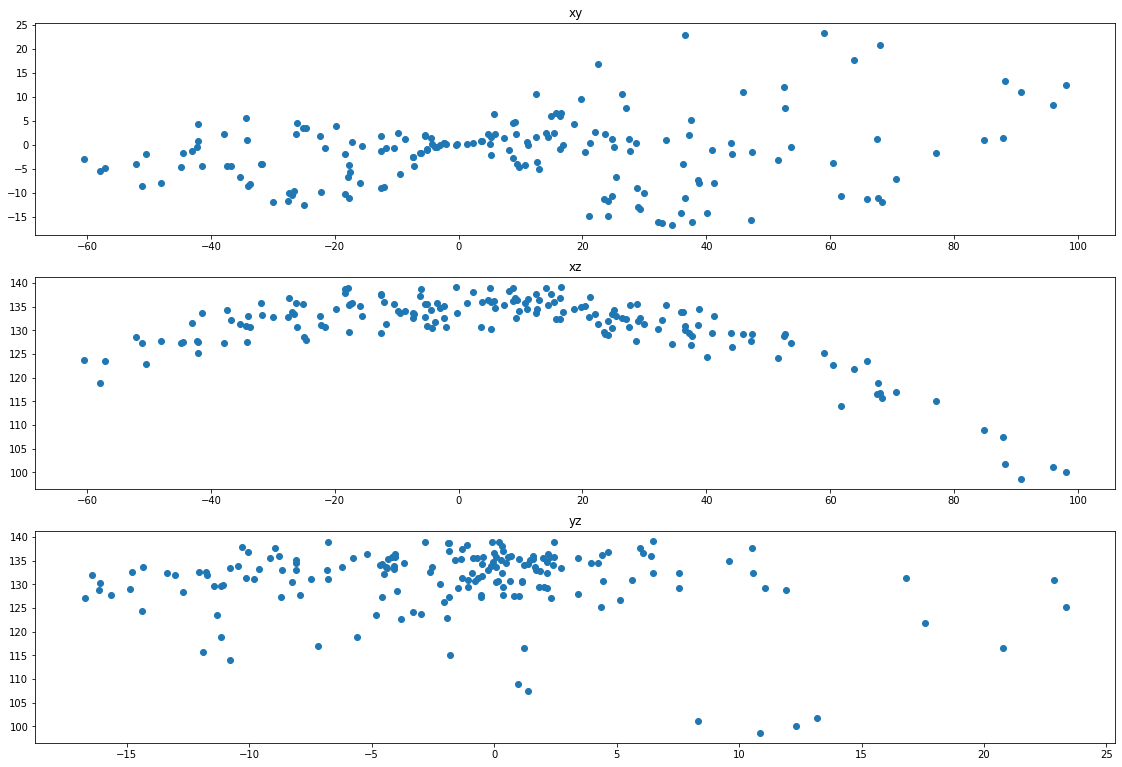

In [12]:
fig, axs = plt.subplots(3, 1)
axs[0].scatter(c['x'], c['y'])
axs[0].set_title('xy')
axs[1].scatter(c['x'], c['z'])
axs[1].set_title('xz')
axs[2].scatter(c['y'], c['z'])
axs[2].set_title('yz')
plt.subplots_adjust(1.5, 1.5, 4, 4)

In [16]:
output = pleiades.to_csv()

### Below Beehive Cluster

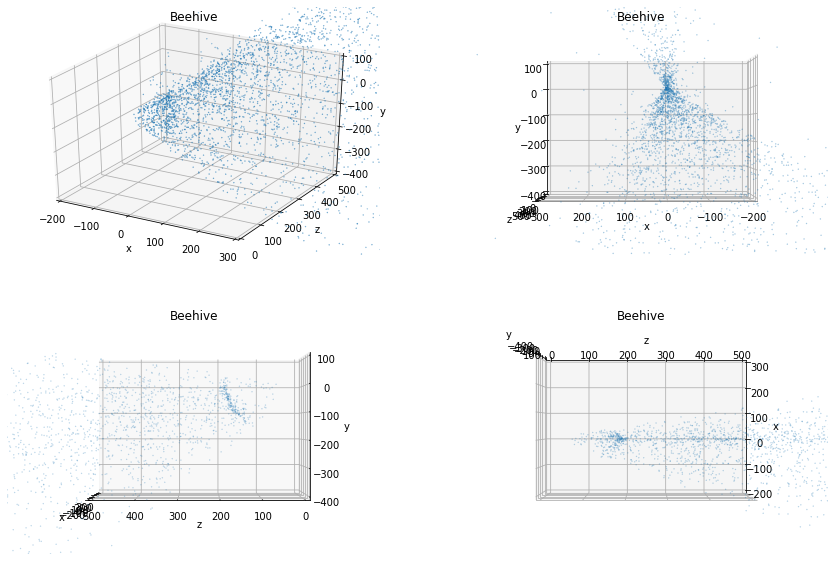

In [17]:
#RA > 130.1750 - .5 AND RA < 130.1750 + .5
#DEC > 19.9833 - .5 AND DEC < 19.9833 + .5
#parallax > 0

data_frame = pd.read_csv("beehive.csv")
beehive = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
beehive.loc[:, 'parallax_arcsec'] = beehive['parallax'].apply(lambda x: x*.001)
beehive.loc[:, 'R'] = beehive['parallax_arcsec'].apply(distance)
beehive.loc[:, 'x'] = beehive.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
beehive.loc[:, 'y'] = beehive.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
beehive.loc[:, 'z'] = beehive.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axh = fig.add_subplot(221, projection ='3d')
axh.scatter(beehive['x'], beehive['z'], beehive['y'], s=0.1)
axh.set_xlim([-200, 300])
axh.set_ylim([0, 500])
axh.set_zlim([-400, 100])
axh.set_xlabel('x')
axh.set_ylabel('z')
axh.set_zlabel('y')
axh.set_title('Beehive')

axh1 = fig.add_subplot(222, projection ='3d')
axh1.scatter(beehive['x'], beehive['z'], beehive['y'], s=0.1)
axh1.set_xlim([-200, 300])
axh1.set_ylim([0, 500])
axh1.set_zlim([-400, 100])
axh1.set_xlabel('x')
axh1.set_ylabel('z')
axh1.set_zlabel('y')
axh1.set_title('Beehive')
axh1.view_init(0, 90)
plt.show

axh2 = fig.add_subplot(223, projection ='3d')
axh2.scatter(beehive['x'], beehive['z'], beehive['y'], s=0.1)
axh2.set_xlim([-200, 300])
axh2.set_ylim([0, 500])
axh2.set_zlim([-400, 100])
axh2.set_xlabel('x')
axh2.set_ylabel('z')
axh2.set_zlabel('y')
axh2.set_title('Beehive')
axh2.view_init(0, 180)
plt.show

axh3 = fig.add_subplot(224, projection ='3d')
axh3.scatter(beehive['x'], beehive['z'], beehive['y'], s=0.1)
axh3.set_xlim([-200, 300])
axh3.set_ylim([0, 500])
axh3.set_zlim([-400, 100])
axh3.set_xlabel('x')
axh3.set_ylabel('z')
axh3.set_zlabel('y')
axh3.set_title('Beehive')
axh3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

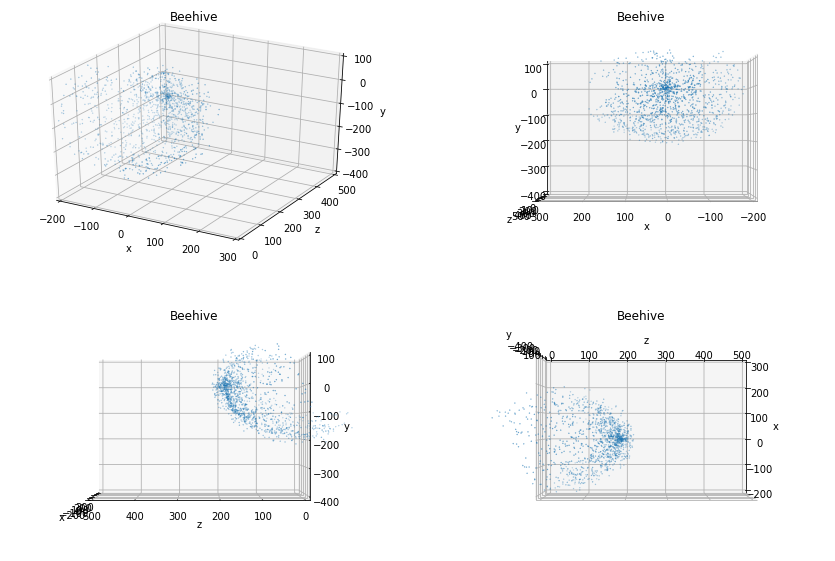

In [18]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 128.5 and 131.5 AND
#DEC between 18.5 and 21.5 AND
#parallax > 4.55 AND parallax < 7.14

data_frame = pd.read_csv("beehive3.csv")
beehive3 = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
beehive3.loc[:, 'parallax_arcsec'] = beehive3['parallax'].apply(lambda x: x*.001)
beehive3.loc[:, 'R'] = beehive3['parallax_arcsec'].apply(distance)
beehive3.loc[:, 'x'] = beehive3.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
beehive3.loc[:, 'y'] = beehive3.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
beehive3.loc[:, 'z'] = beehive3.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axh = fig.add_subplot(221, projection ='3d')
axh.scatter(beehive3['x'], beehive3['z'], beehive3['y'], s=0.1)
axh.set_xlim([-200, 300])
axh.set_ylim([0, 500])
axh.set_zlim([-400, 100])
axh.set_xlabel('x')
axh.set_ylabel('z')
axh.set_zlabel('y')
axh.set_title('Beehive')

axh1 = fig.add_subplot(222, projection ='3d')
axh1.scatter(beehive3['x'], beehive3['z'], beehive3['y'], s=0.1)
axh1.set_xlim([-200, 300])
axh1.set_ylim([0, 500])
axh1.set_zlim([-400, 100])
axh1.set_xlabel('x')
axh1.set_ylabel('z')
axh1.set_zlabel('y')
axh1.set_title('Beehive')
axh1.view_init(0, 90)
plt.show

axh2 = fig.add_subplot(223, projection ='3d')
axh2.scatter(beehive3['x'], beehive3['z'], beehive3['y'], s=0.1)
axh2.set_xlim([-200, 300])
axh2.set_ylim([0, 500])
axh2.set_zlim([-400, 100])
axh2.set_xlabel('x')
axh2.set_ylabel('z')
axh2.set_zlabel('y')
axh2.set_title('Beehive')
axh2.view_init(0, 180)
plt.show

axh3 = fig.add_subplot(224, projection ='3d')
axh3.scatter(beehive3['x'], beehive3['z'], beehive3['y'], s=0.1)
axh3.set_xlim([-200, 300])
axh3.set_ylim([0, 500])
axh3.set_zlim([-400, 100])
axh3.set_xlabel('x')
axh3.set_ylabel('z')
axh3.set_zlabel('y')
axh3.set_title('Beehive')
axh3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

In [30]:
data_frame = pd.read_csv("pleiades.csv")

In [31]:
data_frame.head(10)

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url
0,1635721458409799680,Gaia DR2 65202860594037248,65202860594037248,208461428,2015.5,56.544299,1.312314,23.852152,1.071421,0.449200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
1,1635721458409799680,Gaia DR2 65000619174228224,65000619174228224,52115357,2015.5,57.065831,0.402129,23.696713,0.262636,0.415548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
2,1635721458409799680,Gaia DR2 65211248666930432,65211248666930432,956504887,2015.5,56.639273,0.039845,23.967605,0.024730,1.542492,...,0.4360,200111.0,0.799872,0.736285,0.859709,0.318156,0.297680,0.338631,http://geadata.esac.esa.int/data-server/datali...,NaN
3,1635721458409799680,Gaia DR2 65173933991086464,65173933991086464,805889036,2015.5,56.445009,0.079420,23.650847,0.051970,0.864438,...,1.0211,200111.0,1.141614,1.078659,1.206520,0.334018,0.264294,0.403743,http://geadata.esac.esa.int/data-server/datali...,NaN
4,1635721458409799680,Gaia DR2 65010484713157248,65010484713157248,402944518,2015.5,56.838247,0.751002,23.721293,0.513050,2.765235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
5,1635721458409799680,Gaia DR2 65176442251988736,65176442251988736,1503074308,2015.5,56.359007,0.195812,23.669697,0.142085,0.289109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
6,1635721458409799680,Gaia DR2 65012615017882368,65012615017882368,1322665369,2015.5,57.015014,0.990610,23.711402,0.527237,1.564043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
7,1635721458409799680,Gaia DR2 65214650281045632,65214650281045632,1239074995,2015.5,56.419761,0.119547,23.855061,0.080200,0.257081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
8,1635721458409799680,Gaia DR2 65205746812063232,65205746812063232,614788452,2015.5,56.763267,0.416645,23.853484,0.270482,5.168245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN
9,1635721458409799680,Gaia DR2 65221762746776064,65221762746776064,19212139,2015.5,56.443176,0.069050,24.064752,0.047892,0.062865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://geadata.esac.esa.int/data-server/datali...,NaN


In [32]:
data_frame.shape[1]

96

In [39]:
data_frame.keys()[data_frame.shape[1]-1]

'epoch_photometry_url'

In [44]:
pleiades.loc[:, 'parallax_arcsec'] = pleiades['parallax'].apply(lambda x: x*.001)
pleiades.loc[:, 'R'] = pleiades['parallax_arcsec'].apply(distance)
pleiades.loc[:, 'x'] = pleiades.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
pleiades.loc[:, 'y'] = pleiades.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
pleiades.loc[:, 'z'] = pleiades.apply(lambda r: z(r['R'], r['b']), axis=1)
df = pleiades[['x', 'y', 'z']]

### M35 star cluster
Or NGC 2168

SELECT * from gaiadr2.gaia_source where 
RA between 90.75 and 93.75 AND 
DEC between 22.85 and 25.85 AND
parallax >= .833 AND parallax <= .909 AND
phot_g_mean_mag < 18

In [3]:
m35 = pd.read_csv("m35_1100_1200.csv")
m35 = m35[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
m35.loc[:, 'parallax_arcsec'] = m35['parallax'].apply(lambda x: x*.001)
m35.loc[:, 'R'] = m35['parallax_arcsec'].apply(distance)
m35.loc[:, 'x'] = m35.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
m35.loc[:, 'y'] = m35.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
m35.loc[:, 'z'] = m35.apply(lambda r: z(r['R'], r['b']), axis=1)

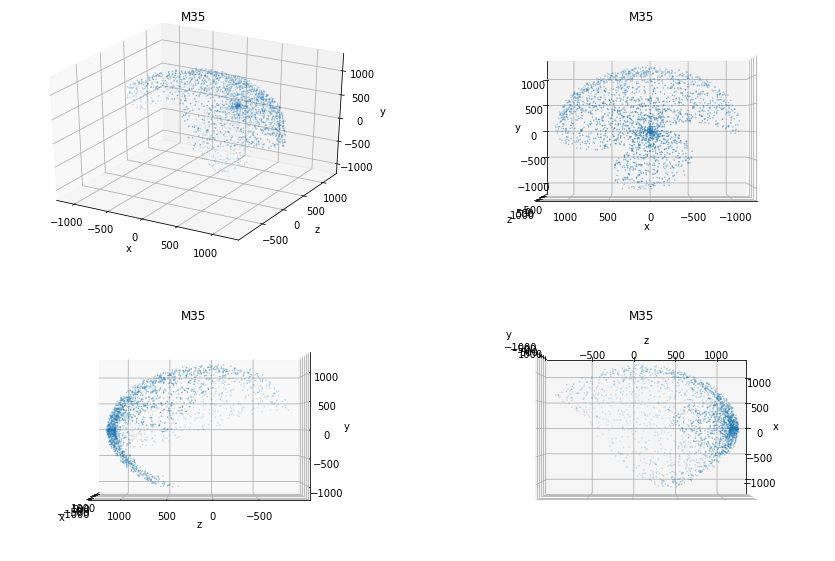

In [4]:
fig = plt.figure()
axh = fig.add_subplot(221, projection ='3d')
axh.scatter(m35['x'], m35['z'], m35['y'], s=0.1)
axh.set_xlabel('x')
axh.set_ylabel('z')
axh.set_zlabel('y')
axh.set_title('M35')

axh1 = fig.add_subplot(222, projection ='3d')
axh1.scatter(m35['x'], m35['z'], m35['y'], s=0.1)
axh1.set_xlabel('x')
axh1.set_ylabel('z')
axh1.set_zlabel('y')
axh1.set_title('M35')
axh1.view_init(0, 90)
plt.show

axh2 = fig.add_subplot(223, projection ='3d')
axh2.scatter(m35['x'], m35['z'], m35['y'], s=0.1)
axh2.set_xlabel('x')
axh2.set_ylabel('z')
axh2.set_zlabel('y')
axh2.set_title('M35')
axh2.view_init(0, 180)
plt.show

axh3 = fig.add_subplot(224, projection ='3d')
axh3.scatter(m35['x'], m35['z'], m35['y'], s=0.1)
axh3.set_xlabel('x')
axh3.set_ylabel('z')
axh3.set_zlabel('y')
axh3.set_title('M35')
axh3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

In [3]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 90.75 and 93.75 AND 
#DEC between 22.85 and 25.85 AND
#parallax >= .2 AND parallax <= .909 AND
#phot_g_mean_mag < 18

m35 = pd.read_csv("m351100-5000.csv")
m35 = m35[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
m35.loc[:, 'parallax_arcsec'] = m35['parallax'].apply(lambda x: x*.001)
m35.loc[:, 'R'] = m35['parallax_arcsec'].apply(distance)
m35.loc[:, 'x'] = m35.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
m35.loc[:, 'y'] = m35.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
m35.loc[:, 'z'] = m35.apply(lambda r: z(r['R'], r['b']), axis=1)

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


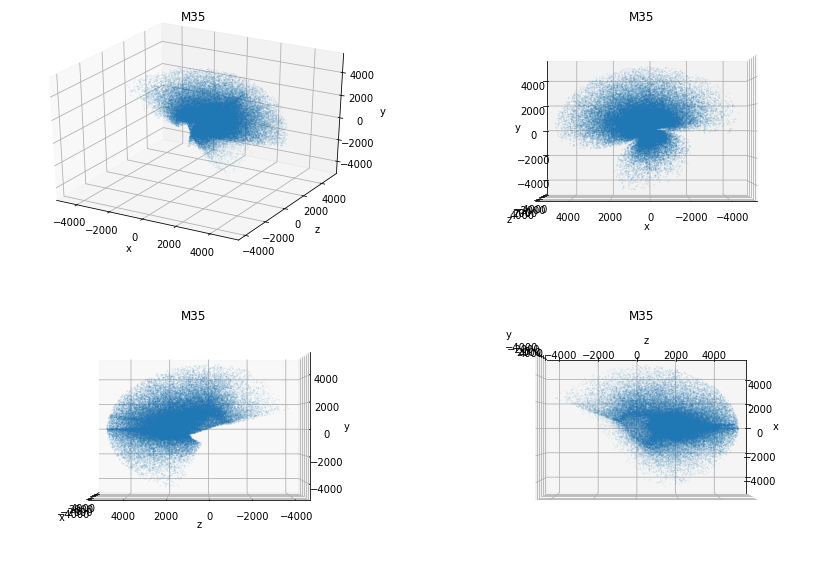

In [5]:
fig = plt.figure()
axh = fig.add_subplot(221, projection ='3d')
axh.scatter(m35['x'], m35['z'], m35['y'], s=0.01)
axh.set_xlabel('x')
axh.set_ylabel('z')
axh.set_zlabel('y')
axh.set_title('M35')

axh1 = fig.add_subplot(222, projection ='3d')
axh1.scatter(m35['x'], m35['z'], m35['y'], s=0.01)
axh1.set_xlabel('x')
axh1.set_ylabel('z')
axh1.set_zlabel('y')
axh1.set_title('M35')
axh1.view_init(0, 90)
plt.show

axh2 = fig.add_subplot(223, projection ='3d')
axh2.scatter(m35['x'], m35['z'], m35['y'], s=0.01)
axh2.set_xlabel('x')
axh2.set_ylabel('z')
axh2.set_zlabel('y')
axh2.set_title('M35')
axh2.view_init(0, 180)
plt.show

axh3 = fig.add_subplot(224, projection ='3d')
axh3.scatter(m35['x'], m35['z'], m35['y'], s=0.01)
axh3.set_xlabel('x')
axh3.set_ylabel('z')
axh3.set_zlabel('y')
axh3.set_title('M35')
axh3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

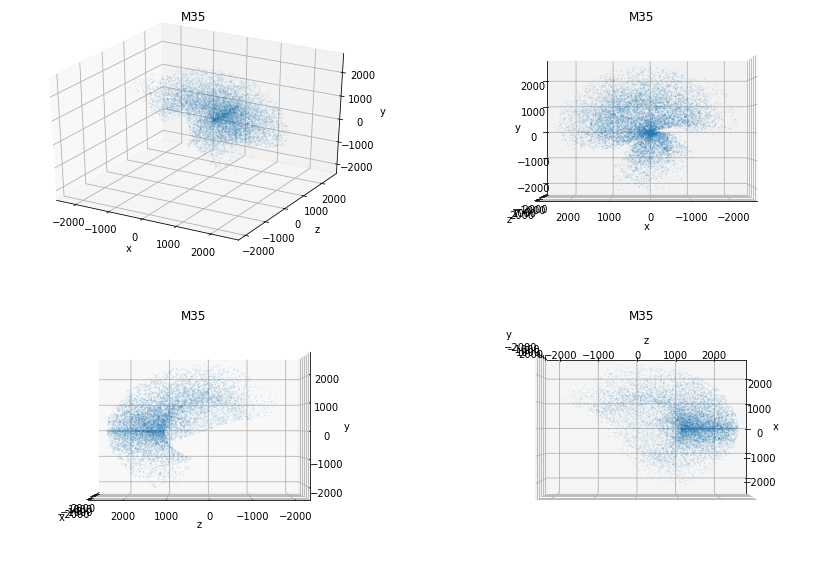

In [3]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 90.75 and 93.75 AND 
#DEC between 22.85 and 25.85 AND
#parallax >= .4 AND parallax <= .909 AND
#phot_g_mean_mag < 16

m35 = pd.read_csv("m35.4_.9.csv")
m35 = m35[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
m35.loc[:, 'parallax_arcsec'] = m35['parallax'].apply(lambda x: x*.001)
m35.loc[:, 'R'] = m35['parallax_arcsec'].apply(distance)
m35.loc[:, 'x'] = m35.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
m35.loc[:, 'y'] = m35.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
m35.loc[:, 'z'] = m35.apply(lambda r: z(r['R'], r['b']), axis=1)
fig = plt.figure()
axh = fig.add_subplot(221, projection ='3d')
axh.scatter(m35['x'], m35['z'], m35['y'], s=0.01)
axh.set_xlabel('x')
axh.set_ylabel('z')
axh.set_zlabel('y')
axh.set_title('M35')

axh1 = fig.add_subplot(222, projection ='3d')
axh1.scatter(m35['x'], m35['z'], m35['y'], s=0.01)
axh1.set_xlabel('x')
axh1.set_ylabel('z')
axh1.set_zlabel('y')
axh1.set_title('M35')
axh1.view_init(0, 90)
plt.show

axh2 = fig.add_subplot(223, projection ='3d')
axh2.scatter(m35['x'], m35['z'], m35['y'], s=0.01)
axh2.set_xlabel('x')
axh2.set_ylabel('z')
axh2.set_zlabel('y')
axh2.set_title('M35')
axh2.view_init(0, 180)
plt.show

axh3 = fig.add_subplot(224, projection ='3d')
axh3.scatter(m35['x'], m35['z'], m35['y'], s=0.01)
axh3.set_xlabel('x')
axh3.set_ylabel('z')
axh3.set_zlabel('y')
axh3.set_title('M35')
axh3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

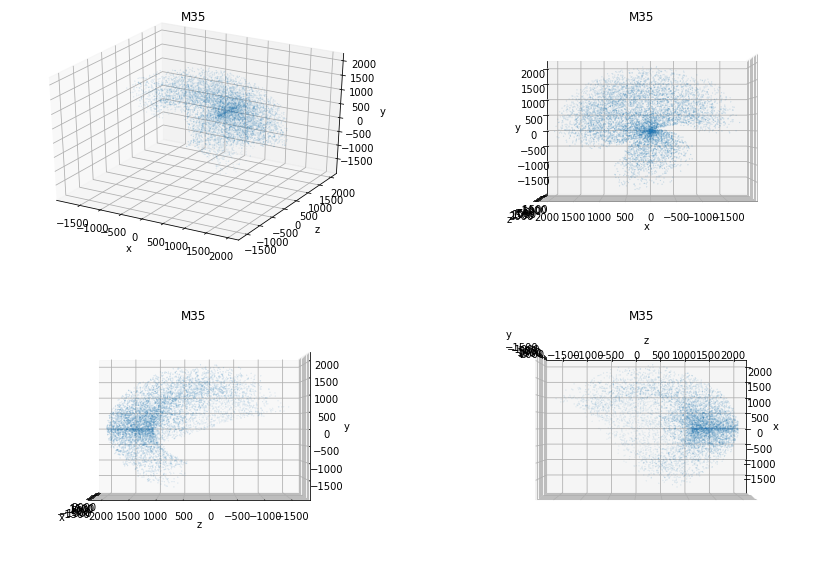

In [4]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 90.75 and 93.75 AND 
#DEC between 22.85 and 25.85 AND
#parallax >= .5 AND parallax <= .909 AND
#phot_g_mean_mag < 16

m35 = pd.read_csv("m35.5_.9.csv")
m35 = m35[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'b', 'l']]
m35.loc[:, 'parallax_arcsec'] = m35['parallax'].apply(lambda x: x*.001)
m35.loc[:, 'R'] = m35['parallax_arcsec'].apply(distance)
m35.loc[:, 'x'] = m35.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
m35.loc[:, 'y'] = m35.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
m35.loc[:, 'z'] = m35.apply(lambda r: z(r['R'], r['b']), axis=1)
fig = plt.figure()
axh = fig.add_subplot(221, projection ='3d')
axh.scatter(m35['x'], m35['z'], m35['y'], s=0.01)
axh.set_xlabel('x')
axh.set_ylabel('z')
axh.set_zlabel('y')
axh.set_title('M35')

axh1 = fig.add_subplot(222, projection ='3d')
axh1.scatter(m35['x'], m35['z'], m35['y'], s=0.01)
axh1.set_xlabel('x')
axh1.set_ylabel('z')
axh1.set_zlabel('y')
axh1.set_title('M35')
axh1.view_init(0, 90)
plt.show

axh2 = fig.add_subplot(223, projection ='3d')
axh2.scatter(m35['x'], m35['z'], m35['y'], s=0.01)
axh2.set_xlabel('x')
axh2.set_ylabel('z')
axh2.set_zlabel('y')
axh2.set_title('M35')
axh2.view_init(0, 180)
plt.show

axh3 = fig.add_subplot(224, projection ='3d')
axh3.scatter(m35['x'], m35['z'], m35['y'], s=0.01)
axh3.set_xlabel('x')
axh3.set_ylabel('z')
axh3.set_zlabel('y')
axh3.set_title('M35')
axh3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()